<a href="https://colab.research.google.com/github/FedorYatsenko/NN_Labs/blob/master/Yatsenko_Lab1_classwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1 Yatsenko
### № 17

1. Import

In [0]:
import numpy as np

from google.colab import drive
from matplotlib.pyplot import plot

2. Load data

In [51]:
drive.mount('/content/drive')

path = "/content/drive/My Drive/Colab Notebooks/lab1/"

f0 = 'sample017.csv'
f1 = 'sampleCh1.csv'
f2 = 'sampleCh2.csv'
f3 = 'sampleCh3.csv'

data0 = np.genfromtxt(path + f0, delimiter=',')
data1 = np.genfromtxt(path + f1, delimiter=',')
data2 = np.genfromtxt(path + f2, delimiter=',')
data3 = np.genfromtxt(path + f3, delimiter=',')

print(f"d0 = {data0.shape}, d1 = {data1.shape}, d2 = {data2.shape}, d3 = {data3.shape}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
d0 = (600, 3), d1 = (2000, 3), d2 = (2000, 3), d3 = (2000, 4)


2.1. Show data

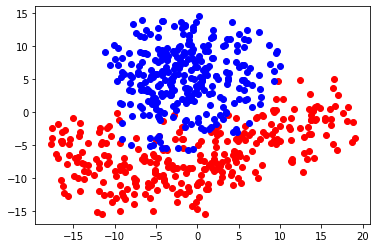

In [52]:
x1, y1 = [], []
x2, y2 = [], []

for x, y, group in data0:
  if group == 0:
    x1.append(x)
    y1.append(y)
  elif group == 1:
    x2.append(x)
    y2.append(y)
  else:
    print(group)

plot(x1, y1, 'ro', x2, y2, 'bo')

3. Нейрон МакКаллока-Піттса

In [0]:
import numpy as np


def func(x):
    if x >= 0:
        return 1
    return 0


class Neuron:
    def __init__(self, shape=2, learning_rate=1):
        self.bias = 0
        self.w = np.zeros(shape=shape)
        self.learning_rate = learning_rate
        self.history = []

    def calc(self, xs):
        y = self.bias
        for i, x in enumerate(xs):
            y += self.w[i] * x

        return func(y)

    def change_w(self, xs, y, d):
        e = d - y  # calc error
        self.bias = self.bias + self.learning_rate * e

        for i, x in enumerate(xs):
            self.w[i] = self.w[i] + self.learning_rate * e * x

    def train(self, data, max_epoch=0, max_error=0):
        p = 1
        self.history = []

        while p != max_epoch:
            abs_e = 0

            for *xs, target_group in data:
                result_group = self.calc(xs)
                self.change_w(xs, result_group, target_group)

            for *xs, target_group in data:
                result_group = self.calc(xs)
                if result_group != target_group:
                    abs_e += 1

            this_epoch = (abs_e, self.bias, self.w.copy())
            self.history.append(this_epoch)

            p += 1

            if abs_e <= max_error:
                print('Max error')
                break
        else:
            print('Max epoch')

        return self.history

    def get_best_w(self):
        min_abs_e, min_bias, min_w = self.history[0]
        min_epoch = 0

        for i, (abs_e, bias, w) in enumerate(self.history):
            if abs_e < min_abs_e:
                min_abs_e, min_epoch, min_bias, min_w = abs_e, i + 1, bias, w

        return min_abs_e, min_epoch, min_bias, min_w

    def get_line(self, x):
        *_, bias, w = self.get_best_w()
        return -(w[0] / w[1] * x) - (bias / w[1])


4. File 017

Max epoch
(47, 126, 13.0, array([-2.41322141, 22.47163374]))


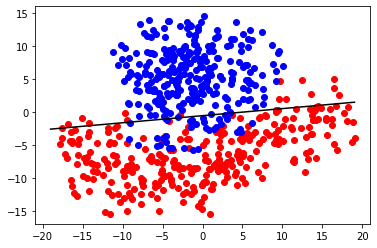

In [95]:
model0 = Neuron()
model0.train(data0, max_epoch=1000)

print(model0.get_best_w())

x1, y1 = [], []
x2, y2 = [], []

for x, y, group in data0:
  if group == 0:
    x1.append(x)
    y1.append(y)
  elif group == 1:
    x2.append(x)
    y2.append(y)
  else:
    print(group)

xs = [-19, 19]
ys1 = [model0.get_line(x_) for x_ in xs]

plot(x1, y1, 'ro', x2, y2, 'bo', xs, ys1, 'k')

5. File Ch1

Max error
(0, 12, 53.0, array([ 3.22917865, 10.25231609]))


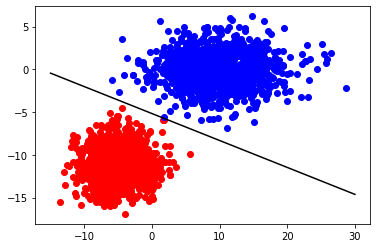

In [96]:
model1 = Neuron()
model1.train(data1, max_epoch=1000)
print(model1.get_best_w())

x1, y1 = [], []
x2, y2 = [], []

for x, y, group in data1:
  if group == 0:
    x1.append(x)
    y1.append(y)
  elif group == 1:
    x2.append(x)
    y2.append(y)
  else:
    print(group)

xs = [-15, 30]
ys1 = [model1.get_line(x_) for x_ in xs]

plot(x1, y1, 'ro', x2, y2, 'bo', xs, ys1, 'k')

6. File Ch2

Max epoch
(14, 58, 21.0, array([ 7.61054375, 10.73842465]))


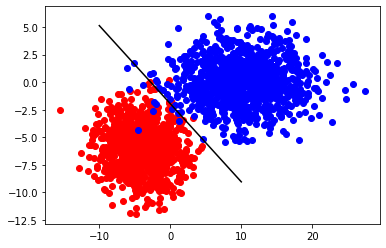

In [97]:
model2 = Neuron()
model2.train(data2, max_epoch=1000)
print(model2.get_best_w())

x1, y1 = [], []
x2, y2 = [], []

for x, y, group in data2:
  if group == 0:
    x1.append(x)
    y1.append(y)
  elif group == 1:
    x2.append(x)
    y2.append(y)
  else:
    print(group)

xs = [-10, 10]
ys1 = [model2.get_line(x_) for x_ in xs]

plot(x1, y1, 'ro', x2, y2, 'bo', xs, ys1, 'k')

7. File Ch3


In [98]:
model3 = Neuron(shape=3)
history = model3.train(data3, max_epoch=1000)
print(model3.get_best_w())

#for i, arr in enumerate(history):
#  print(f'{i}. {arr}')

Max epoch
(9, 966, 23.0, array([ 7.7571212 , 12.79832712, 12.80614844]))
